<a href="https://colab.research.google.com/github/public-void-main/newre/blob/main/week_6_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
df=pd.DataFrame(pd.read_csv("Cereals.csv"))

#replace with
df["calories"] = df["calories"].replace(-1, df["calories"].mean())
df["protein"] = df["protein"].replace(-1, df["protein"].mean())
df["fat"] = df["fat"].replace(-1, df["fat"].mean())
df["sodium"] = df["sodium"].replace(-1, df["sodium"].mean())
df["fiber"] = df["fiber"].replace(-1, df["fiber"].mean())
df["carbo"] = df["carbo"].replace(-1, df["carbo"].mean())
df['sugars']=df['sugars'].replace(-1,df['sugars'].mean())
df['potass']=df['potass'].replace(-1,df['potass'].mean())
df['vitamins']=df['vitamins'].replace(-1,df['vitamins'].mean())

#how many unique brands of cereal are there
print("The unique brands of cereal manufacturers are: "+str(len(pd.unique(df['mfr'])))+"\n")

The unique brands of cereal manufacturers are: 7



In [16]:
#how many hot/cold cereals
print(df['type'].value_counts())

type
C    73
H     3
Name: count, dtype: int64


In [17]:
df=pd.DataFrame(pd.read_csv("Cereals.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     int64  
 10  potass    76 non-null     int64  
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.6+ KB


In [18]:
d_x=df[['shelf','rating']]
print(d_x['shelf'].value_counts())
d_x=d_x.reset_index(drop=True)

shelf
3    35
2    21
1    20
Name: count, dtype: int64


,shelf,rating
count,76.000000,76.000000
mean,2.197368,42.327057
std,0.832982,13.820602
min,1.000000,18.042851
25%,1.000000,32.932466
50%,2.000000,40.253086
75%,3.000000,50.780847
max,3.000000,93.704912


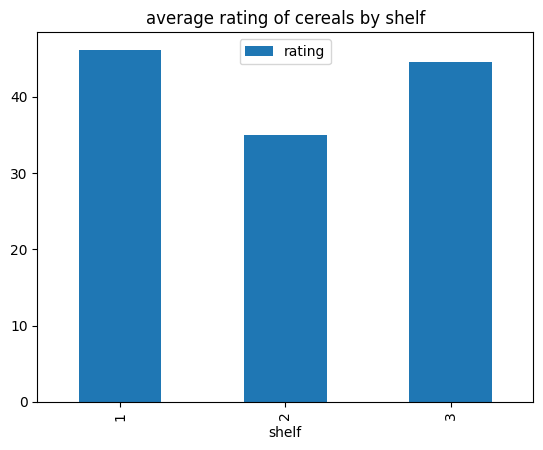

In [19]:
r_avg=d_x.groupby('shelf').mean()
r_avg.plot(kind='bar',title='average rating of cereals by shelf')
d_x.describe()

In [20]:
#Compare the rating for hot vs cold cereals. Which do people prefer?
d_h=df[df['type']=='H']['rating']
d_c=df[df['type']=='C']['rating']
print("mean rating of hot cereals: "+str(d_h.mean()))
print("mean rating of cold cereals: "+str(d_c.mean()))


mean rating of hot cereals: 56.73770833333334
mean rating of cold cereals: 41.73483816438357


In [24]:
#Which cereals have the highest fiber and lowest sugar?
d_f=df[['fiber','sugars','name']]
print(d_f.loc[d_f['fiber'].idxmax(),['name','sugars','fiber']])
print("\n")
print(d_f.loc[d_f['sugars'].idxmin(),['name','sugars','fiber']])

name      All-Bran_with_Extra_Fiber
sugars                          0.0
fiber                          14.0
Name: 2, dtype: object


name      All-Bran_with_Extra_Fiber
sugars                          0.0
fiber                          14.0
Name: 2, dtype: object


In [25]:
#Which Cereals that have more than 3 grams of protein?
d_p=df[['name','protein']]
d_p=d_p['name'][d_p['protein']>3]
print(d_p)

1                                  All-Bran
2                 All-Bran_with_Extra_Fiber
10                                 Cheerios
40                                     Life
42                                    Maypo
43     Muesli_Raisins,_Dates,_&amp;_Almonds
44    Muesli_Raisins,_Peaches,_&amp;_Pecans
55                       Quaker_Oat_Squares
56                           Quaker_Oatmeal
66                                Special_K
Name: name, dtype: object


In [26]:
#what is the best and worst cereal
cereal_best=df.loc[df['rating'].idxmax(),'name']
cereal_worst=df.loc[df['rating'].idxmin(),'name']
print("The best cereal is: "+cereal_best)
print("The worst cereal is: "+cereal_worst)

The best cereal is: All-Bran_with_Extra_Fiber
The worst cereal is: Cap'n'Crunch


In [27]:
df_mfr=df['mfr']
print(df_mfr.value_counts())

mfr
K    23
G    22
P     9
R     8
Q     8
N     5
A     1
Name: count, dtype: int64


<Axes: title={'center': 'comp calories and sugars'}, xlabel='sugars', ylabel='calories'>

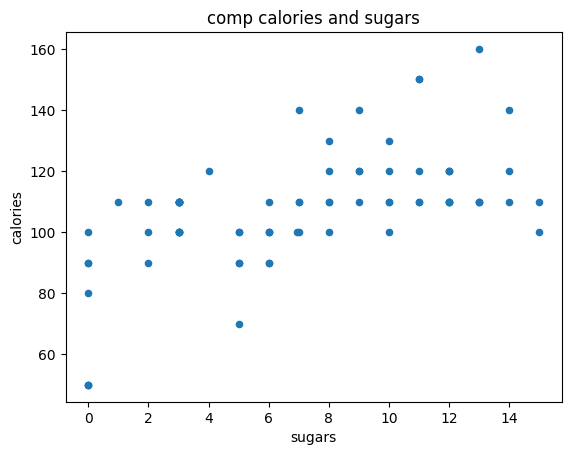

In [28]:
#sugar vs calorie comparison
df.plot(kind='scatter',x='sugars',y='calories',title='comp calories and sugars')

In [ ]:
#Avg nutrition
